In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities 

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Color Conversion
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now Writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # Color Conversion
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) #Draw face connection
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    #Draw face connection
    # Grid Lines
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(80,120,10), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             )

    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,120,10), thickness=1, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=2)
                             )
    
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,120,10), thickness=1, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=2)
                             )
         
    # Draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,120,10), thickness=1, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=2)
                             )
                             

In [6]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [7]:
mp_drawing.draw_landmarks??

In [8]:
# To access the webcam using openCV
cap = cv2.VideoCapture(0)
# Access Mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show the screen
        cv2.imshow('OpenCV Feed', image)

        # Break the loop
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [9]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [10]:
results

mediapipe.python.solution_base.SolutionOutputs

In [11]:
draw_landmarks(frame, results)

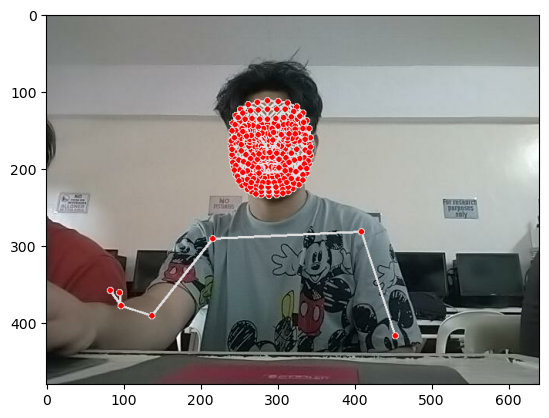

In [12]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [13]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [14]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [15]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [16]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    

In [17]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [19]:
result_test = extract_keypoints(results)

In [20]:
result_test

array([ 0.45375291,  0.37304822, -0.51587522, ...,  0.        ,
        0.        ,  0.        ])

In [21]:
468*3+33*4+21*3+21*3

1662

In [22]:
np.save('0', result_test)

In [23]:
np.load('0.npy')

array([ 0.45375291,  0.37304822, -0.51587522, ...,  0.        ,
        0.        ,  0.        ])

In [24]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_DATA')

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# videos are going to be 30 frames in length
sequence_length = 30

In [25]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I Love you

In [26]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [27]:
cap = cv2.VideoCapture(0)
# Access Mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # Apply collection logic
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 4, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 4, cv2.LINE_AA)
                
                # New export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Show the screen
                cv2.imshow('OpenCV Feed', image)

        # Break the loop
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [28]:
cap.release()
cv2.destroyAllWindows()

In [29]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [30]:
label_map = {label:num for num, label in enumerate(actions)}

In [31]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [32]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [33]:
np.array(labels).shape

(90,)

In [34]:
X = np.array(sequences)

In [35]:
X.shape

(90, 30, 1662)

In [36]:
y = to_categorical(labels).astype(int)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [38]:
y_test.shape

(5, 3)

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [40]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [63]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [64]:
res = [.7, 0.2, 0.1]

In [65]:
actions[np.argmax(res)]

'hello'

In [66]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [45]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 5s 71ms/step - loss: 1.4368 - categorical_accuracy: 0.2941
Epoch 2/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.2285 - categorical_accuracy: 0.3059
Epoch 3/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.1549 - categorical_accuracy: 0.3412
Epoch 4/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.0839 - categorical_accuracy: 0.3294
Epoch 5/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0774 - categorical_accuracy: 0.4000
Epoch 6/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.0702 - categorical_accuracy: 0.4000
Epoch 7/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0552 - categorical_accuracy: 0.3882
Epoch 8/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0498 - categorical_accuracy: 0.4706
Epoch 9/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.0309 - categorical_accuracy: 0.4588
E

3/3 [==============================] - 0s 60ms/step - loss: 0.5612 - categorical_accuracy: 0.7529
Epoch 75/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.5544 - categorical_accuracy: 0.7412
Epoch 76/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.4953 - categorical_accuracy: 0.8235
Epoch 77/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.4991 - categorical_accuracy: 0.7882
Epoch 78/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.4606 - categorical_accuracy: 0.7882
Epoch 79/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.4694 - categorical_accuracy: 0.7529
Epoch 80/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.4470 - categorical_accuracy: 0.8353
Epoch 81/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.4286 - categorical_accuracy: 0.8471
Epoch 82/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.4634 - categorical_accuracy: 0.7294
Epoch 

3/3 [==============================] - 0s 62ms/step - loss: 0.5730 - categorical_accuracy: 0.7059
Epoch 147/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.4968 - categorical_accuracy: 0.8000
Epoch 148/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.5014 - categorical_accuracy: 0.7765
Epoch 149/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.5895 - categorical_accuracy: 0.7412
Epoch 150/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.5456 - categorical_accuracy: 0.7765
Epoch 151/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.5228 - categorical_accuracy: 0.7529
Epoch 152/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.4812 - categorical_accuracy: 0.8118
Epoch 153/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.3846 - categorical_accuracy: 0.8471
Epoch 154/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.3968 - categorical_accuracy: 0.858

3/3 [==============================] - 0s 63ms/step - loss: 0.2688 - categorical_accuracy: 0.9176
Epoch 219/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.2387 - categorical_accuracy: 0.9176
Epoch 220/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.3068 - categorical_accuracy: 0.8588
Epoch 221/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.2729 - categorical_accuracy: 0.8588
Epoch 222/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.2482 - categorical_accuracy: 0.9294
Epoch 223/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.2761 - categorical_accuracy: 0.9059
Epoch 224/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.2548 - categorical_accuracy: 0.9294
Epoch 225/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.2377 - categorical_accuracy: 0.9529
Epoch 226/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.3169 - categorical_accuracy: 0.835

3/3 [==============================] - 0s 66ms/step - loss: 0.7229 - categorical_accuracy: 0.6706
Epoch 291/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.6803 - categorical_accuracy: 0.7412
Epoch 292/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.7084 - categorical_accuracy: 0.6235
Epoch 293/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.6349 - categorical_accuracy: 0.7294
Epoch 294/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.7484 - categorical_accuracy: 0.6824
Epoch 295/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.6558 - categorical_accuracy: 0.6588
Epoch 296/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.7727 - categorical_accuracy: 0.5529
Epoch 297/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.7139 - categorical_accuracy: 0.6706
Epoch 298/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.7670 - categorical_accuracy: 0.576

3/3 [==============================] - 0s 70ms/step - loss: 0.3733 - categorical_accuracy: 0.8824
Epoch 363/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.3979 - categorical_accuracy: 0.8471
Epoch 364/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.3920 - categorical_accuracy: 0.8588
Epoch 365/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.3816 - categorical_accuracy: 0.8353
Epoch 366/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.3521 - categorical_accuracy: 0.8824
Epoch 367/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.3394 - categorical_accuracy: 0.8706
Epoch 368/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.3555 - categorical_accuracy: 0.8706
Epoch 369/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.3174 - categorical_accuracy: 0.9176
Epoch 370/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.3116 - categorical_accuracy: 0.905

3/3 [==============================] - 0s 62ms/step - loss: 0.2675 - categorical_accuracy: 0.9176
Epoch 435/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.2064 - categorical_accuracy: 0.9529
Epoch 436/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.1802 - categorical_accuracy: 0.9529
Epoch 437/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.1672 - categorical_accuracy: 0.9529
Epoch 438/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.1915 - categorical_accuracy: 0.9412
Epoch 439/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.1661 - categorical_accuracy: 0.9529
Epoch 440/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.1803 - categorical_accuracy: 0.9529
Epoch 441/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.5734 - categorical_accuracy: 0.8000
Epoch 442/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.7325 - categorical_accuracy: 0.776

3/3 [==============================] - 0s 62ms/step - loss: 0.6419 - categorical_accuracy: 0.6941
Epoch 507/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.5398 - categorical_accuracy: 0.7647
Epoch 508/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.6082 - categorical_accuracy: 0.6588
Epoch 509/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.4300 - categorical_accuracy: 0.8353
Epoch 510/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.5439 - categorical_accuracy: 0.7059
Epoch 511/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.4207 - categorical_accuracy: 0.8706
Epoch 512/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.4311 - categorical_accuracy: 0.8235
Epoch 513/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.4031 - categorical_accuracy: 0.8941
Epoch 514/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.3555 - categorical_accuracy: 0.917

3/3 [==============================] - 0s 62ms/step - loss: 0.2364 - categorical_accuracy: 0.9529
Epoch 579/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.2173 - categorical_accuracy: 0.9529
Epoch 580/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.2037 - categorical_accuracy: 0.9765
Epoch 581/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.1937 - categorical_accuracy: 0.9647
Epoch 582/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.1851 - categorical_accuracy: 0.9647
Epoch 583/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.1732 - categorical_accuracy: 0.9647
Epoch 584/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.1695 - categorical_accuracy: 0.9647
Epoch 585/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.1585 - categorical_accuracy: 0.9765
Epoch 586/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.1614 - categorical_accuracy: 0.976

3/3 [==============================] - 0s 55ms/step - loss: 0.1167 - categorical_accuracy: 0.9765
Epoch 651/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.1141 - categorical_accuracy: 0.9765
Epoch 652/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.1181 - categorical_accuracy: 0.9765
Epoch 653/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.1186 - categorical_accuracy: 0.9765
Epoch 654/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.1187 - categorical_accuracy: 0.9765
Epoch 655/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.1145 - categorical_accuracy: 0.9765
Epoch 656/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.1124 - categorical_accuracy: 0.9765
Epoch 657/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.1238 - categorical_accuracy: 0.9765
Epoch 658/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.1220 - categorical_accuracy: 0.976

3/3 [==============================] - 0s 65ms/step - loss: 0.1009 - categorical_accuracy: 0.9765
Epoch 723/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.0987 - categorical_accuracy: 0.9765
Epoch 724/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.0978 - categorical_accuracy: 0.9765
Epoch 725/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.0975 - categorical_accuracy: 0.9765
Epoch 726/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.0974 - categorical_accuracy: 0.9765
Epoch 727/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.0953 - categorical_accuracy: 0.9765
Epoch 728/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.0983 - categorical_accuracy: 0.9765
Epoch 729/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.1109 - categorical_accuracy: 0.9765
Epoch 730/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.3483 - categorical_accuracy: 0.670

3/3 [==============================] - 0s 66ms/step - loss: 0.1777 - categorical_accuracy: 0.9529
Epoch 795/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.1406 - categorical_accuracy: 0.9765
Epoch 796/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.1330 - categorical_accuracy: 0.9765
Epoch 797/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.1423 - categorical_accuracy: 0.9765
Epoch 798/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.1382 - categorical_accuracy: 0.9647
Epoch 799/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.1355 - categorical_accuracy: 0.9765
Epoch 800/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.1238 - categorical_accuracy: 0.9765
Epoch 801/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.1345 - categorical_accuracy: 0.9647
Epoch 802/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.1504 - categorical_accuracy: 0.976

3/3 [==============================] - 0s 69ms/step - loss: 0.1532 - categorical_accuracy: 0.9647
Epoch 867/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.2682 - categorical_accuracy: 0.9059
Epoch 868/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.2434 - categorical_accuracy: 0.9059
Epoch 869/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.1957 - categorical_accuracy: 0.9412
Epoch 870/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.1568 - categorical_accuracy: 0.9647
Epoch 871/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.2023 - categorical_accuracy: 0.9176
Epoch 872/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.1848 - categorical_accuracy: 0.9294
Epoch 873/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.1959 - categorical_accuracy: 0.9412
Epoch 874/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.3168 - categorical_accuracy: 0.882

3/3 [==============================] - 0s 61ms/step - loss: 0.1045 - categorical_accuracy: 0.9765
Epoch 939/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.1038 - categorical_accuracy: 0.9765
Epoch 940/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.1073 - categorical_accuracy: 0.9765
Epoch 941/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.1100 - categorical_accuracy: 0.9765
Epoch 942/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.1048 - categorical_accuracy: 0.9765
Epoch 943/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.1146 - categorical_accuracy: 0.9765
Epoch 944/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.1147 - categorical_accuracy: 0.9765
Epoch 945/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.1053 - categorical_accuracy: 0.9765
Epoch 946/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.1050 - categorical_accuracy: 0.976

3/3 [==============================] - 0s 58ms/step - loss: 0.1032 - categorical_accuracy: 0.9765
Epoch 1011/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.0993 - categorical_accuracy: 0.9765
Epoch 1012/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.1041 - categorical_accuracy: 0.9765
Epoch 1013/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.0984 - categorical_accuracy: 0.9765
Epoch 1014/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.1001 - categorical_accuracy: 0.9765
Epoch 1015/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.0976 - categorical_accuracy: 0.9765
Epoch 1016/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.0980 - categorical_accuracy: 0.9765
Epoch 1017/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.0964 - categorical_accuracy: 0.9765
Epoch 1018/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.0980 - categorical_accurac

3/3 [==============================] - 0s 65ms/step - loss: 0.1001 - categorical_accuracy: 0.9765
Epoch 1083/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.0922 - categorical_accuracy: 0.9765
Epoch 1084/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.0968 - categorical_accuracy: 0.9765
Epoch 1085/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.0923 - categorical_accuracy: 0.9765
Epoch 1086/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.1041 - categorical_accuracy: 0.9765
Epoch 1087/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.1040 - categorical_accuracy: 0.9765
Epoch 1088/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.1083 - categorical_accuracy: 0.9765
Epoch 1089/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.1280 - categorical_accuracy: 0.9647
Epoch 1090/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.1322 - categorical_accurac

3/3 [==============================] - 0s 68ms/step - loss: 0.0894 - categorical_accuracy: 0.9765
Epoch 1155/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.0941 - categorical_accuracy: 0.9765
Epoch 1156/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.1012 - categorical_accuracy: 0.9765
Epoch 1157/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.1371 - categorical_accuracy: 0.9294
Epoch 1158/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.6511 - categorical_accuracy: 0.8471
Epoch 1159/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.5716 - categorical_accuracy: 0.8471
Epoch 1160/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.4273 - categorical_accuracy: 0.8235
Epoch 1161/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.5206 - categorical_accuracy: 0.8588
Epoch 1162/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.2591 - categorical_accurac

3/3 [==============================] - 0s 69ms/step - loss: 0.1141 - categorical_accuracy: 0.9765
Epoch 1227/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.1761 - categorical_accuracy: 0.9294
Epoch 1228/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.2122 - categorical_accuracy: 0.9294
Epoch 1229/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.1213 - categorical_accuracy: 0.9765
Epoch 1230/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.1603 - categorical_accuracy: 0.9529
Epoch 1231/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.1981 - categorical_accuracy: 0.9294
Epoch 1232/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.1580 - categorical_accuracy: 0.9412
Epoch 1233/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.3447 - categorical_accuracy: 0.8588
Epoch 1234/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.4615 - categorical_accurac

3/3 [==============================] - 0s 73ms/step - loss: 0.0834 - categorical_accuracy: 0.9765
Epoch 1299/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.0843 - categorical_accuracy: 0.9765
Epoch 1300/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.0834 - categorical_accuracy: 0.9765
Epoch 1301/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.0871 - categorical_accuracy: 0.9765
Epoch 1302/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.1021 - categorical_accuracy: 0.9765
Epoch 1303/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.1050 - categorical_accuracy: 0.9647
Epoch 1304/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.1175 - categorical_accuracy: 0.9647
Epoch 1305/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.1448 - categorical_accuracy: 0.9294
Epoch 1306/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.1950 - categorical_accurac

3/3 [==============================] - 0s 63ms/step - loss: 0.0757 - categorical_accuracy: 0.9765
Epoch 1371/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.0716 - categorical_accuracy: 0.9765
Epoch 1372/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.0746 - categorical_accuracy: 0.9765
Epoch 1373/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.0788 - categorical_accuracy: 0.9765
Epoch 1374/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.0759 - categorical_accuracy: 0.9765
Epoch 1375/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.0766 - categorical_accuracy: 0.9765
Epoch 1376/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.1437 - categorical_accuracy: 0.9412
Epoch 1377/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.1283 - categorical_accuracy: 0.9647
Epoch 1378/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.2323 - categorical_accurac

3/3 [==============================] - 0s 62ms/step - loss: 0.3338 - categorical_accuracy: 0.8706
Epoch 1443/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.3302 - categorical_accuracy: 0.8706
Epoch 1444/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.4160 - categorical_accuracy: 0.8353
Epoch 1445/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.4460 - categorical_accuracy: 0.8000
Epoch 1446/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.3542 - categorical_accuracy: 0.8235
Epoch 1447/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.1872 - categorical_accuracy: 0.9412
Epoch 1448/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.2263 - categorical_accuracy: 0.9176
Epoch 1449/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.2210 - categorical_accuracy: 0.9294
Epoch 1450/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.2192 - categorical_accurac

3/3 [==============================] - 0s 62ms/step - loss: 0.6657 - categorical_accuracy: 0.7765
Epoch 1515/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.6680 - categorical_accuracy: 0.6353
Epoch 1516/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.2273 - categorical_accuracy: 0.6353
Epoch 1517/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.2298 - categorical_accuracy: 0.6471
Epoch 1518/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.4926 - categorical_accuracy: 0.8471
Epoch 1519/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.6556 - categorical_accuracy: 0.7882
Epoch 1520/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.6618 - categorical_accuracy: 0.7294
Epoch 1521/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.9469 - categorical_accuracy: 0.3176
Epoch 1522/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.1902 - categorical_accurac

3/3 [==============================] - 0s 68ms/step - loss: 1.1059 - categorical_accuracy: 0.3294
Epoch 1586/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.1057 - categorical_accuracy: 0.3294
Epoch 1587/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.1057 - categorical_accuracy: 0.3294
Epoch 1588/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.1055 - categorical_accuracy: 0.3294
Epoch 1589/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.1053 - categorical_accuracy: 0.3294
Epoch 1590/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.1053 - categorical_accuracy: 0.3294
Epoch 1591/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.1051 - categorical_accuracy: 0.3294
Epoch 1592/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.1050 - categorical_accuracy: 0.3294
Epoch 1593/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.1048 - categorical_accurac

3/3 [==============================] - 0s 66ms/step - loss: 1.1005 - categorical_accuracy: 0.3294
Epoch 1658/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.1004 - categorical_accuracy: 0.3294
Epoch 1659/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.1004 - categorical_accuracy: 0.3294
Epoch 1660/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.1004 - categorical_accuracy: 0.3294
Epoch 1661/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.1003 - categorical_accuracy: 0.3294
Epoch 1662/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.1003 - categorical_accuracy: 0.3294
Epoch 1663/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.1003 - categorical_accuracy: 0.3294
Epoch 1664/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.1003 - categorical_accuracy: 0.3294
Epoch 1665/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.1002 - categorical_accurac

3/3 [==============================] - 0s 65ms/step - loss: 1.0990 - categorical_accuracy: 0.3294
Epoch 1730/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0991 - categorical_accuracy: 0.3294
Epoch 1731/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0990 - categorical_accuracy: 0.3294
Epoch 1732/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0990 - categorical_accuracy: 0.3294
Epoch 1733/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.0990 - categorical_accuracy: 0.3294
Epoch 1734/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0990 - categorical_accuracy: 0.3294
Epoch 1735/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.0989 - categorical_accuracy: 0.3294
Epoch 1736/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0989 - categorical_accuracy: 0.3294
Epoch 1737/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0989 - categorical_accurac

3/3 [==============================] - 0s 67ms/step - loss: 1.0986 - categorical_accuracy: 0.3412
Epoch 1802/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0986 - categorical_accuracy: 0.3412
Epoch 1803/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0986 - categorical_accuracy: 0.3412
Epoch 1804/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.0986 - categorical_accuracy: 0.3412
Epoch 1805/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0986 - categorical_accuracy: 0.3412
Epoch 1806/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0986 - categorical_accuracy: 0.3412
Epoch 1807/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0986 - categorical_accuracy: 0.3412
Epoch 1808/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0986 - categorical_accuracy: 0.3412
Epoch 1809/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0986 - categorical_accurac

3/3 [==============================] - 0s 65ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1874/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1875/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1876/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1877/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1878/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1879/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1880/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1881/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0985 - categorical_accurac

3/3 [==============================] - 0s 68ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1946/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1947/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1948/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1949/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1950/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1951/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1952/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0985 - categorical_accuracy: 0.3412
Epoch 1953/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0985 - categorical_accurac

In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 59667

In [68]:
res = model.predict(X_test)

1/1 [==============================] - 0s 498ms/step


In [69]:
actions[np.argmax(res[4])]

'hello'

In [70]:
actions[np.argmax(y_test[4])]

'thanks'

In [71]:
model.save('action.h5')

In [72]:
del model

In [73]:
model.load_weights('action.h5')

NameError: name 'model' is not defined

In [74]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [75]:
yhat = model.predict(X_test)

NameError: name 'model' is not defined

In [76]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

NameError: name 'yhat' is not defined

In [77]:
multilabel_confusion_matrix(ytrue, yhat)

NameError: name 'yhat' is not defined

In [78]:
accuracy_score(ytrue, yhat)

NameError: name 'yhat' is not defined

In [79]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [80]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [81]:
<matplotlib.image.AxsImage at 0x1daff6aa278>

SyntaxError: invalid syntax (49256697.py, line 1)

In [82]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [83]:
len(sequence)

TypeError: object of type 'int' has no len()

In [84]:
sequence.append('def')

AttributeError: 'int' object has no attribute 'append'

In [85]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [86]:
sequence[-30:]

TypeError: 'int' object is not subscriptable

In [87]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]
                
            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

NameError: name 'model' is not defined

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
res[np.argmax(res)] > threshold

In [ ]:
(num_sequences,30,1662)

In [ ]:
model.predict(np.expand_dims(X_test[0], axis=0))